# Tentang Data

Kejahatan di wilayah metropolitan utama, seperti London, terjadi dalam pola yang berbeda. 
Data ini mencakup jumlah laporan kriminal menurut bulan, LSOA borough, dan kategori mayor/minor dari Jan 2008-Des 2016.

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set(style = 'whitegrid', color_codes = True)

import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = [16, 12]

%matplotlib inline

from wordcloud import WordCloud, STOPWORDS
import folium

### Read Data

In [2]:
df_LondonCrime = pd.read_csv('D:/HACTIVE/dataset/london_crime_by_lsoa.csv')

df_LondonCrime.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [3]:
df_LondonCrime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [4]:
#Jumlah data tiap tahunnya
df_DataYear = df_LondonCrime.groupby(['year']).size()
df_DataYear

year
2008    1498956
2009    1498956
2010    1498956
2011    1498956
2012    1498956
2013    1498956
2014    1498956
2015    1498956
2016    1498956
dtype: int64

In [5]:
#deskripsi data
df_LondonCrime.describe()

,value,year,month
count,1.349060e+07,1.349060e+07,1.349060e+07
mean,4.779444e-01,2.012000e+03,6.500000e+00
std,1.771513e+00,2.581989e+00,3.452053e+00
min,0.000000e+00,2.008000e+03,1.000000e+00
25%,0.000000e+00,2.010000e+03,3.750000e+00
50%,0.000000e+00,2.012000e+03,6.500000e+00
75%,1.000000e+00,2.014000e+03,9.250000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


In [6]:
#list 33 wilayah
list(df_LondonCrime["borough"].unique())

['Croydon',
 'Greenwich',
 'Bromley',
 'Redbridge',
 'Wandsworth',
 'Ealing',
 'Hounslow',
 'Newham',
 'Sutton',
 'Haringey',
 'Lambeth',
 'Richmond upon Thames',
 'Hillingdon',
 'Havering',
 'Barking and Dagenham',
 'Kingston upon Thames',
 'Westminster',
 'Hackney',
 'Enfield',
 'Harrow',
 'Lewisham',
 'Brent',
 'Southwark',
 'Barnet',
 'Waltham Forest',
 'Camden',
 'Bexley',
 'Kensington and Chelsea',
 'Islington',
 'Tower Hamlets',
 'Hammersmith and Fulham',
 'Merton',
 'City of London']

In [7]:
#list 9 kategori mayor
list(df_LondonCrime["major_category"].unique())

['Burglary',
 'Violence Against the Person',
 'Robbery',
 'Theft and Handling',
 'Criminal Damage',
 'Drugs',
 'Fraud or Forgery',
 'Other Notifiable Offences',
 'Sexual Offences']

### Interpretasi Data

data df_LondonCrime berjumlah 13 juta data, yang berisi jumlah laporan kriminal menurut bulan, wilayah LSOA, dan kategori mayor/minor. dengan jumlah data pada masing-masing tahun sebanyak 1.498.956 data. dengan 33 wilayah dan juga 9 kategori kejahatan mayor.

- Count = Jumlah data/baris pada dataset, data ini sebanyak 13 jt data
- mean  = nilai rata rata, untuk kolom value memiliki rata2 sebesar 4.779444e-01
- std   = nilai akar kuadrat dari suatu varians, data ini memiliki std sebesar 1.771513e+00
- min   = Nilai paling minimum pada setiap kolom, pada kolom value memiliki nilai minimum 0
- 25%   = Q1
- 50%   = Q2
- 75%   = Q3
- max   = Nilai maksimum pada setiap kolom, pada kolom value memiliki nilai maximum 3.090000e+02

### Dataset Contains :
- lsoa_code: code for Lower Super Output Area in Greater London.
- borough: Common name for London borough.
- major_category: High level categorization of crime
- minor_category: Low level categorization of crime within major category.
- value: monthly reported count of categorical crime in given borough
- year: Year of reported counts, 2008-2016
- month: Month of reported counts, 1-12

# Analisis Data
### Missing Values

In [8]:
df_LondonCrime.isnull().sum()

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

In [9]:
df_LondonCrime.isnull().values.any()

False

### Interpretasi Missing Values

data ini tidak terdapat missing values, yang artinya tidak ada data yang hilang sehingga data dapat dianalisis. serta dibuat visualisasi datanya.

# Visualisasi Data

In [10]:
df_crime = df_LondonCrime.set_index(['year','month'])
df_crime

lsoa_code     borough               major_category  \
year month                                                       
2016 11     E01001116     Croydon                     Burglary   
     11     E01001646   Greenwich  Violence Against the Person   
2015 5      E01000677     Bromley  Violence Against the Person   
2016 3      E01003774   Redbridge                     Burglary   
2008 6      E01004563  Wandsworth                      Robbery   
...               ...         ...                          ...   
2015 2      E01000504       Brent              Criminal Damage   
     6      E01002504  Hillingdon                      Robbery   
2011 2      E01004165      Sutton                     Burglary   
     5      E01001134     Croydon                      Robbery   
2015 6      E01003413      Merton  Violence Against the Person   

                         minor_category  value  
year month                                      
2016 11     Burglary in Other Buildings      0  
     11                  Other violence      0  
2015 5                   Other violence      0  
2016 3      Burglary in Other Buildings      0  
2008 6                Personal Property      0  
...                                 ...    ...  
2015 2      Criminal Damage To Dwelling      0  
     6                Personal Property      1  
2011 2           Burglary in a Dwelling      0  
     5                Business Property      0  
2015 6                     Wounding/GBH      0  

[13490604 rows x 5 columns]

## Bar Chart
Tentukan total laporan kriminalitas di london setiap tahunnya (2008-2016)!

In [11]:
#Ubah nama kolom menjadi string
df_LondonCrime.columns = list(map(str, df_LondonCrime.columns))

In [12]:
#menghapus kolom yang tidak digunakan
df_LondonCrime.drop(['lsoa_code','minor_category'], axis=1, inplace=True)

In [13]:
#mengurutkan data berdasarkan tahun
df_SortCrime= df_LondonCrime

df_SortCrime.sort_values(['year', 'month', 'value'], ascending=True, axis=0, inplace=True)
df_SortCrime = df_SortCrime
df_SortCrime

,borough,major_category,value,year,month
33,Havering,Violence Against the Person,0,2008,1
60,Hounslow,Other Notifiable Offences,0,2008,1
102,Lewisham,Other Notifiable Offences,0,2008,1
129,Hammersmith and Fulham,Criminal Damage,0,2008,1
293,Ealing,Theft and Handling,0,2008,1
...,...,...,...,...,...
8452387,Westminster,Theft and Handling,97,2016,12
10337826,Westminster,Theft and Handling,108,2016,12
9984731,Westminster,Theft and Handling,128,2016,12
2514416,Westminster,Theft and Handling,140,2016,12


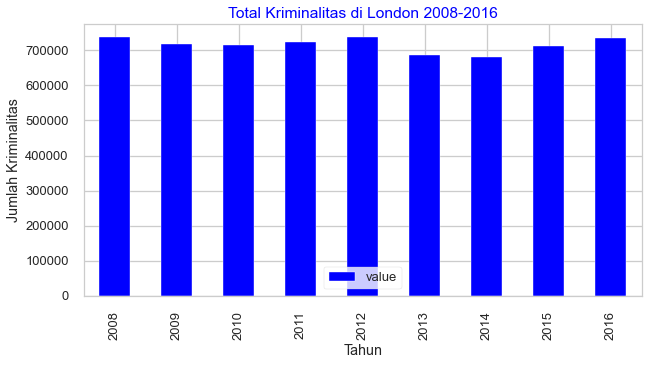

In [14]:
df_year = df_SortCrime.groupby(['year']).sum()

#menghapus kolom yang tidak digunakan
df_year.drop(['month'], axis=1, inplace=True)

df_year.plot(kind='bar', color='blue', figsize=(10,5))

plt.xlabel('Tahun')
plt.ylabel('Jumlah Kriminalitas')
plt.ylim(ymin=0)
plt.title('Total Kriminalitas di London 2008-2016', color='blue')

plt.show()

In [15]:
df_year.sort_values(['value'], ascending=False, axis=0, inplace=True)
df_year = df_year
df_year

,value
year,
2008,738641
2012,737329
2016,736121
2011,724915
2009,717214
2010,715324
2015,711624
2013,686407
2014,680183


### Interpretasi

Berdasarkan pada bar chart diatas laporan kriminalitas di London tahun 2008-2016 dapat disimpulkan bahwa pada tahun 2008 merupakan tahun yang paling banyak terjadi kriminalitasnya, sedangkan tahun 2014 merupakan tahun yang paling rendah terjadi kriminalitas. jumlah dari laporan kriminalitas tahun 2008 tercatat sebanyak 738.641 ribu laporan. 

## Area Chart
Tentukan top 5 wilayah yang paling banyak terjadi kriminalitas pada tahun 2008!

In [16]:
df_SortCrime.sort_index(inplace=True)

In [17]:
df_SortCrime.columns

Index(['borough', 'major_category', 'value', 'year', 'month'], dtype='object')

In [18]:
#mengurutkan wilayah berdasarkan jumlah value tertinggi
df_borough = df_SortCrime.groupby(['borough']).sum()

df_borough.drop(['year', 'month'], axis=1, inplace=True)

df_borough.sort_values(['value'], ascending=False, axis=0, inplace=True)
df_borough = df_borough
df_borough.head(5)

,value
borough,
Westminster,455028
Lambeth,292178
Southwark,278809
Camden,275147
Newham,262024


In [19]:
#group
df_group = df_SortCrime.groupby(['borough', 'year'])[['value']].sum().reset_index()
df_group

,borough,year,value
0,Barking and Dagenham,2008,17656
1,Barking and Dagenham,2009,17713
2,Barking and Dagenham,2010,17130
3,Barking and Dagenham,2011,16686
4,Barking and Dagenham,2012,15990
...,...,...,...
292,Westminster,2012,59226
293,Westminster,2013,53852
294,Westminster,2014,47564
295,Westminster,2015,47395


In [20]:
#Ubah nama kolom value menjadi total
df_group.rename(columns={"value":"total"}, inplace=True)

In [21]:
#reset index
df_group.reset_index(inplace=True)

In [22]:
df_group

,index,borough,year,total
0,0,Barking and Dagenham,2008,17656
1,1,Barking and Dagenham,2009,17713
2,2,Barking and Dagenham,2010,17130
3,3,Barking and Dagenham,2011,16686
4,4,Barking and Dagenham,2012,15990
...,...,...,...,...
292,292,Westminster,2012,59226
293,293,Westminster,2013,53852
294,294,Westminster,2014,47564
295,295,Westminster,2015,47395


In [23]:
#List tahun
years = list(df_group["year"].unique())
years

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]

In [24]:
#List wilayah
boroughs = list(df_group["borough"].unique())
boroughs

['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'City of London',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

In [25]:
df_wilayah = pd.DataFrame(df_group, columns=years, index=boroughs)
df_wilayah.head()

for borough in boroughs:
    for year in years:
        df_wilayah.at[borough, year] = int(df_group.loc[
            (df_group["borough"] == borough)
            & (df_group["year"] == year), "total"
        ])

#buat kolom tota
df_wilayah["total"] = df_wilayah.sum(axis=1)

#urutkan data berdasarkan kolom total
df_wilayah.sort_values(["total"], ascending=False, inplace=True)

#Top 5 wilayah paling banyak
df_top5 = df_wilayah.head()
df_top5

,2008,2009,2010,2011,2012,2013,2014,2015,2016,total
Westminster,47846.0,48456.0,48116.0,54243.0,59226.0,53852.0,47564.0,47395.0,48330.0,455028.0
Lambeth,31717.0,31225.0,31671.0,33224.0,33473.0,31868.0,31765.0,33164.0,34071.0,292178.0
Southwark,33470.0,30623.0,31320.0,30723.0,30737.0,31128.0,28912.0,30260.0,31636.0,278809.0
Camden,32010.0,31612.0,31804.0,33956.0,31472.0,28435.0,27198.0,29477.0,29183.0,275147.0
Newham,29752.0,28610.0,30728.0,27978.0,30067.0,27577.0,28005.0,29217.0,30090.0,262024.0


In [26]:
#hapus kolom total
del df_top5["total"]

In [27]:
#transpose df_top5_borough
df_top5_borough = df_top5.transpose()
df_top5_borough

,Westminster,Lambeth,Southwark,Camden,Newham
2008,47846.0,31717.0,33470.0,32010.0,29752.0
2009,48456.0,31225.0,30623.0,31612.0,28610.0
2010,48116.0,31671.0,31320.0,31804.0,30728.0
2011,54243.0,33224.0,30723.0,33956.0,27978.0
2012,59226.0,33473.0,30737.0,31472.0,30067.0
2013,53852.0,31868.0,31128.0,28435.0,27577.0
2014,47564.0,31765.0,28912.0,27198.0,28005.0
2015,47395.0,33164.0,30260.0,29477.0,29217.0
2016,48330.0,34071.0,31636.0,29183.0,30090.0


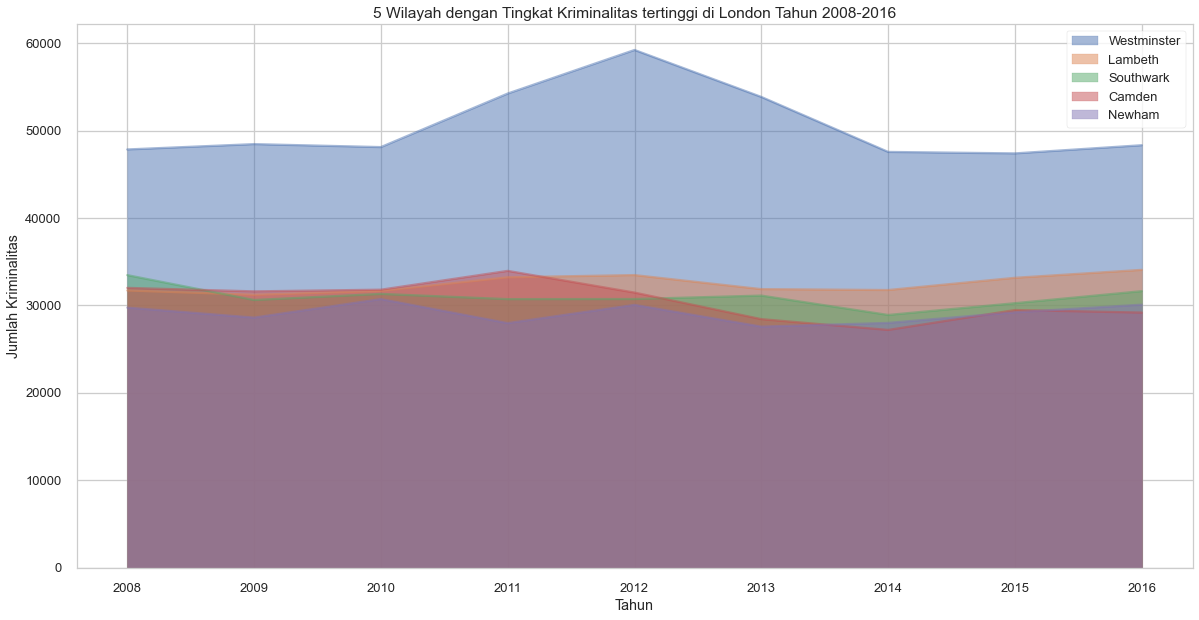

In [28]:
df_top5_borough.index = df_top5_borough.index.map(int)

df_top5_borough.plot(kind='area',
            stacked=False,
            figsize=(20, 10),
            )

plt.title('5 Wilayah dengan Tingkat Kriminalitas tertinggi di London Tahun 2008-2016')
plt.ylabel('Jumlah Kriminalitas')
plt.xlabel('Tahun')

plt.show()

### Interpretasi

Berdasarkan pada area chart diatas, dapat dilihat terdapat 5 wilayah dengan tingkat kriminalitas paling banyak di london pada tahun 2008-2016. dapat disimpulkan dari area chart diatas bahwa pada wilayah westminster merupakan wilayah yang paling banyak terjadi kejahatan/kriminalitas. dengan jumlah kejadian sebanyak 455.028 ribu, dimana kejadian kejahatan tersebut paling banyak terjadi pada tahun 2012 sebanyak 59.226 ribu

## Pie Chart

Tentukan persentase kategori kejahatan mayor/tingkat tinggi di london pada tahun 2008-2016!

In [29]:
def create_list_number_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(df_LondonCrime.loc[df_LondonCrime[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 

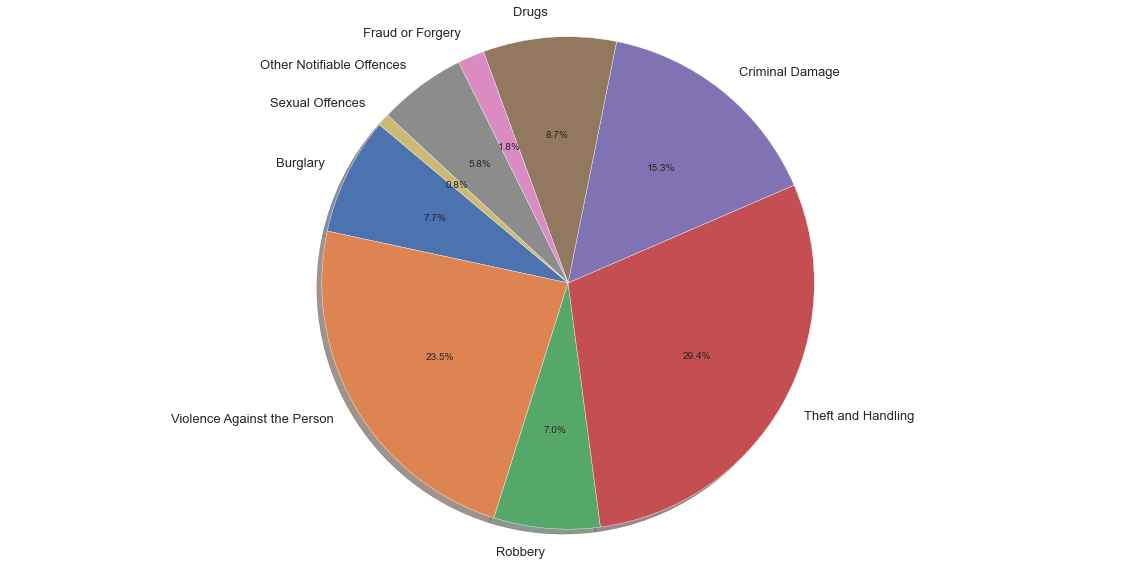

In [30]:
list_unique_major, list_number_major = create_list_number_crime('major_category',df_LondonCrime['major_category'].unique())
pie_plot(list_unique_major, list_number_major)

In [31]:
#mengurutkan kategori mayor berdasarkan jumlah value
df_major = df_SortCrime.groupby(['major_category']).sum()

#menghapus kolom yang tidak digunakan
df_major.drop(['year', 'month'], axis=1, inplace=True)

df_major.sort_values(['value'], ascending=False, axis=0, inplace=True)
df_major = df_major
df_major

,value
major_category,
Theft and Handling,2661861
Violence Against the Person,1558081
Burglary,754293
Criminal Damage,630938
Drugs,470765
Robbery,258873
Other Notifiable Offences,106349
Fraud or Forgery,5325
Sexual Offences,1273


### Interpretasi

Berdasarkan pada pie chart diatas, terlihat bahwa kategori kejahatan mayor/tingkat tinggi terdapat 9 kategori. dengan persentase tiap kategorinya dapat dilihat pada pie chart diatas. untuk persentase tertinggi, yaitu kategori kejahatan theft and handling yang berwarna merah sebesar 29,4% atau sebanyak 2.661.861 juta yang terjadi pada tahun 2008-2016. sedangkan untuk kejahatan kategori mayor/tingkat tinggi yang paling sedikit terjadi yaitu kejahatan sexual offences yang berwarna hijau muda sebesar 0,8% atau sebanyak 1.273 ribu kejadian.

## Histogram

Berapa distribusi frekuensi jumlah kejahatan kategori mayor/tingkat tinggi dari berbagai wilayah di london pada tahun 2008?

In [32]:
#Data london crime Tahun 2008

df_2008 = df_SortCrime[df_SortCrime["year"] == 2008]
df_2008

df_2008.sort_values(['value'], ascending=False, axis=0, inplace=True)
df_2008 = df_2008
df_2008

C:\Users\Rizqatasyaa\AppData\Local\Temp\ipykernel_15600\2444877698.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2008.sort_values(['value'], ascending=False, axis=0, inplace=True)


,borough,major_category,value,year,month
13423472,Westminster,Theft and Handling,300,2008,3
3277025,Westminster,Theft and Handling,288,2008,11
12317524,Westminster,Theft and Handling,286,2008,12
7942318,Westminster,Theft and Handling,267,2008,7
7930489,Westminster,Theft and Handling,254,2008,2
...,...,...,...,...,...
5158596,Haringey,Other Notifiable Offences,0,2008,9
5158588,Merton,Theft and Handling,0,2008,7
5158530,Bexley,Violence Against the Person,0,2008,12
5158526,Camden,Theft and Handling,0,2008,5


In [33]:
#Total Kriminalitas tiap wilayah tahun 2008

df_borough_2008 = df_2008.groupby(['borough']).sum()

#menghapus kolom yang tidak digunakan
df_borough_2008.drop(['year', 'month'], axis=1, inplace=True)

df_borough_2008.sort_values(['value'], ascending=False, axis=0, inplace=True)
df_borough_2008 = df_borough_2008
df_borough_2008

df_borough_2008.reset_index()

,borough,value
0,Westminster,47846
1,Southwark,33470
2,Camden,32010
3,Lambeth,31717
4,Newham,29752
5,Croydon,29516
6,Ealing,28947
7,Lewisham,27054
8,Islington,26273
9,Haringey,25724


In [34]:
count, bin_edges = np.histogram(df_borough_2008)

print(count)
print(bin_edges)

[ 1  0  5  3 10  7  6  0  0  1]
[    0.   4784.6  9569.2 14353.8 19138.4 23923.  28707.6 33492.2 38276.8
 43061.4 47846. ]


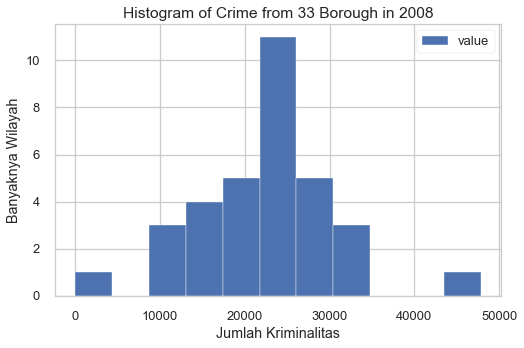

In [35]:
df_borough_2008.plot(kind='hist', figsize=(8,5), bins=11)

plt.title('Histogram of Crime from 33 Borough in 2008')
plt.ylabel('Banyaknya Wilayah')
plt.xlabel('Jumlah Kriminalitas')

plt.show()

### Interpretasi

Berdasarkan pada histogram diatas, distribusi frekuensi kejadian kejahatan kategori mayor/tingkat tinggi dari 33 wilayah di london tahun 2008. histogram tersebut menyimpulkan bahwa kisaran bin dan distribusi frekuensi kejahatan di tahun 2008, yaitu
- 1 wilayah terjadi antara 0 sampai 4784.6 kejadian
- 0 wilayah terjadi antara 4784.6 sampai 9569.2 kejadian
- 5 wilayah terjadi antara 9569.2 sampai 14353.8 kejadian 
- 3 wilayah terjadi antara 14353.8 sampai 19138.4 kejadian 
- 10 wilayah terjadi antara 19138.4 sampai 23923. kejadian 
- 7 wilayah terjadi antara 23923. sampai 28707.6 kejadian 
- 6 wilayah terjadi antara 28707.6 sampai 33492.2 kejadian 
- 0 wilayah terjadi antara 33492.2 sampai 38276.8 kejadian 
- 0 wilayah terjadi antara 38276.8 sampai 43061.4 kejadian 
- 1 wilayah terjadi antara 43061.4 sampai 47846. kejadian 

## Box Plot

Tentukan bulan manakah yang memiliki kriminalitas terbanyak selama tahun 2008-2016?

In [36]:
df_SortCrime

,borough,major_category,value,year,month
0,Croydon,Burglary,0,2016,11
1,Greenwich,Violence Against the Person,0,2016,11
2,Bromley,Violence Against the Person,0,2015,5
3,Redbridge,Burglary,0,2016,3
4,Wandsworth,Robbery,0,2008,6
...,...,...,...,...,...
13490599,Brent,Criminal Damage,0,2015,2
13490600,Hillingdon,Robbery,1,2015,6
13490601,Sutton,Burglary,0,2011,2
13490602,Croydon,Robbery,0,2011,5


In [37]:
#mengurutkan bulan berdasarkan jumlah value
df_month = pd.DataFrame(df_SortCrime.groupby(['year', 'month'])['value'].sum().sort_values(ascending=False))
df_month.head()

,,value
year,month,
2012,3,67537
2016,7,65519
2008,1,65419
2012,5,64344
2008,7,64126


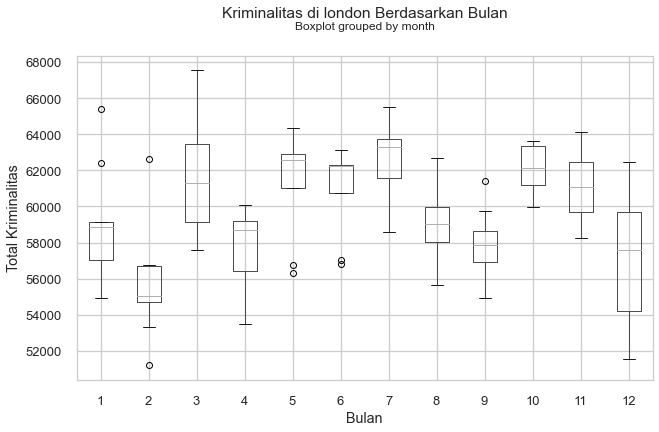

In [38]:
ax = df_month.boxplot(column='value', by='month', figsize=(10, 6))

ax.set_title("Kriminalitas di london Berdasarkan Bulan", y=1.1)
ax.set_ylabel("Total Kriminalitas")
ax.set_xlabel("Bulan")

plt.show()

### Interpretasi

Berdasarkan pada boxplot diatas, dalam 9 tahun terakhir jumlah kasus kriminal yang paling tinggi terjadi pada bulan 3 serta tidak memiliki pencilan. sedangkan bulan yang memiliki pencilan yaitu pada bulan 1,2,5,6, dan 9. untuk pencilan paling jauh yaitu pada bulan 1.

## Scatter Plot

Bagaimana sebaran data kriminalitas di london dari top 5 wilayah yang sering terjadi kejahatan tahun 2008-2016?

In [39]:
#membuat data frame dari top 5 wilayah
df_scatter = df_wilayah.loc[['Westminster', 'Lambeth', 'Southwark', 'Camden', 'Newham'], years].transpose()
df_sp = pd.DataFrame(df_scatter.sum(axis=1))
df_sp.reset_index(inplace=True)
df_sp.columns = ['year', 'value']
df_sp['year'] = df_sp['year'].astype(int)
df_sp

,year,value
0,2008,174795.0
1,2009,170526.0
2,2010,173639.0
3,2011,180124.0
4,2012,184975.0
5,2013,172860.0
6,2014,163444.0
7,2015,169513.0
8,2016,173310.0


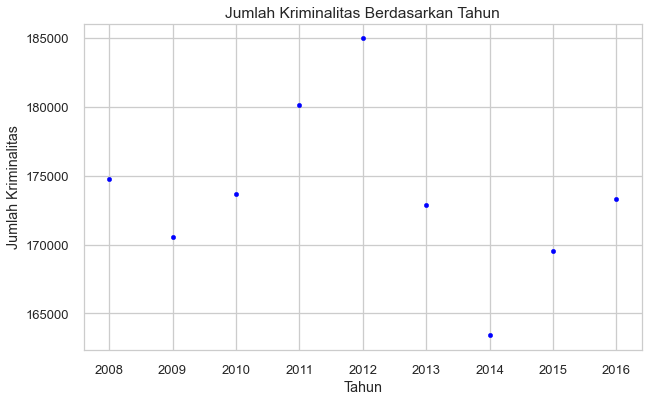

In [40]:
df_sp.plot(kind='scatter', x='year', y='value', figsize=(10, 6), color='blue')

plt.title('Jumlah Kriminalitas Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kriminalitas')

plt.show()


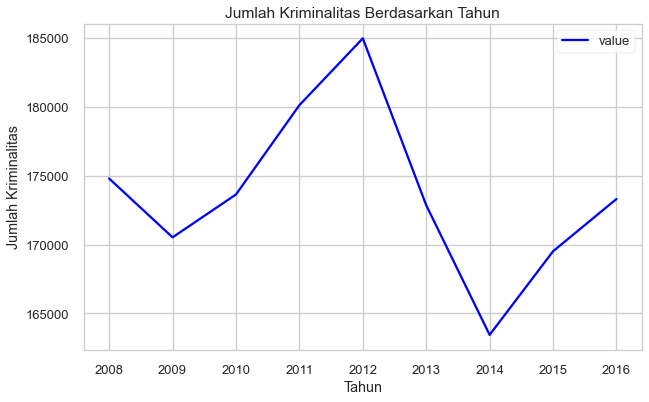

In [41]:
#menggunakan garis
df_sp.plot(kind='line', x='year', y='value', figsize=(10, 6), color='blue')

plt.title('Jumlah Kriminalitas Berdasarkan Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kriminalitas')

plt.show()

### Interpretasi

Berdasarkan scatter plot diatas, total kriminalitas dari top 5 wilayah yang paling banyak terjadi tindak kejahatan yaitu Westminster, Lambeth, Southwark, Camden dan Newham. mengalami peningkatan pada tahun 2012 sebanyak 184.975 ribu dan kriminalitas mengalami penurunan dari tahun 2012 sampai 2014 sebanyak 163.444 ribu. setalah itu pada tahun 2015 dan 2016 mengalami peningkatan kembali.

## Word Clouds

In [42]:
#data word berdasarkan wilayah di newham
df_word = df_LondonCrime[df_LondonCrime['borough'].isin(['Newham'])]
df_word

,borough,major_category,value,year,month
8,Newham,Criminal Damage,0,2013,9
41,Newham,Violence Against the Person,3,2009,5
71,Newham,Criminal Damage,0,2015,1
86,Newham,Burglary,0,2015,2
94,Newham,Theft and Handling,0,2016,3
...,...,...,...,...,...
13490462,Newham,Drugs,0,2015,1
13490480,Newham,Theft and Handling,1,2015,5
13490484,Newham,Violence Against the Person,0,2008,7
13490554,Newham,Theft and Handling,0,2009,5


In [43]:
df_word = df_word['major_category'].str.cat(sep= ' ')

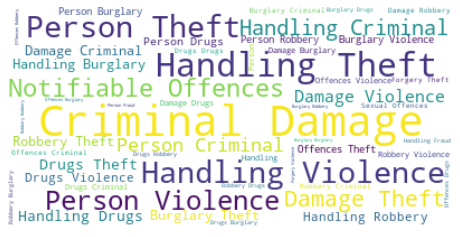

In [44]:
stopwords = set(STOPWORDS)

df_wordcloud = WordCloud(background_color='white', max_words=2000, stopwords=stopwords)

df_wordcloud.generate(df_word)

fig = plt.figure()
fig.set_figwidth(8)
fig.set_figheight(12)

plt.imshow(df_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Interpretasi

kata-kata yang ditampilkan pada word clouds adalah kata-kata yang berasal dari data wilayah newham berdasarkan kategori mayor

## Follium Maps

In [45]:
#map kota london

latitude = 51.509865
longitude = -0.118092

london_map = folium.Map(location=[latitude,longitude], zoom_start=12)
london_map


In [46]:
#map kota westminster

import folium
from folium.plugins import HeatMap


map_hooray = folium.Map(location=[39.842285,-105.043716],
                        zoom_start = 12, min_zoom=12)

heat_df = df_LondonCrime[df_LondonCrime['year']==2008]
heat_df = heat_df[heat_df['borough'] == 'Westminster'] 

folium.CircleMarker ([39.842285,-105.043716],
                     radius=50,
                     popup='Homicide',
                     color='red',
                    ).add_to(map_hooray)

map_hooray

merupakan map wilayah westminster, dimana wilayah ini merupakan wilayah yang paling tinggi tingkat kejahatannya.

# Kesimpulan

Berdasarkan dari hasil visualisasi data sederhana yang saya buat dapat disimpulkan bahwa data kejahatan london (london crime data) pada tahun 2008-2016 terdapat sekitar 13 juta data dengan 33 wilayah dan 9 kategori kejahatan mayor/tingkat tinggi. setelah dilakukan visualisasi data, berikut beberapa kesimpulan yang diperoleh :
- untuk kriminalitas yang terjadi di 33 wilayah pada tahun 2008-2016, pada tahun 2008 merupakan tahun yang paling banyak terjadi kriminalitas.
- top 5 wilayah yang paling banyak terjadi kriminalitas di london yaitu Westminster, Lambeth, Southwark, Camden dan Newham
- kategori kejahatan mayor/tingkat tinggi yang terjadi di london tahun 2008-2016 adalah Theft and Handling	, sedangkan yang paling sedikit terjadi adalah Sexual Offences
- untuk bulan yang paling banyak terjadi kriminalitas selama tahun 2008-2016 yaitu pada bulan maret atau bulan ke-3.